<a href="https://colab.research.google.com/github/aniketmishr/ml-tutorial/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
X,y = make_blobs(n_samples = 1000, centers = 2, random_state  =0)

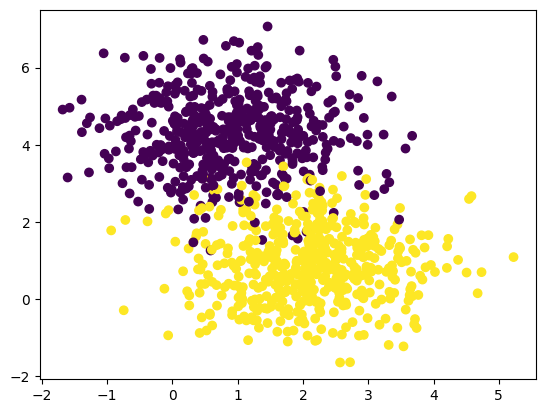

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel = "linear")
model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
model.coef_

array([[ 0.45163128, -1.76567184]])

In [ ]:
x1_sample = np.linspace(-6,7)
colors = ["red", "blue"]
y_colors = list(map(lambda c: colors[c],y))
y_colors[:5], y[:5]

(['red', 'red', 'red', 'blue', 'blue'], array([0, 0, 0, 1, 1]))

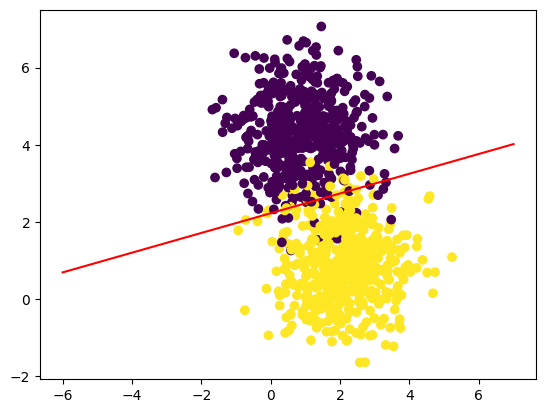

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

for i , (coef,intercept) in enumerate(zip(model.coef_,model.intercept_)):
  x2_sample = -coef[0]/coef[1] * x1_sample - intercept /coef[1]
  plt.plot(x1_sample,x2_sample,color = colors[i])

#custom implementation

In [ ]:
#replace 0 with -1
y[y==0] = -1
##

In [ ]:


class SVM:
    def __init__(self, C=1.0):
        self.C = C # penalty
        self.W = 0 # weights
        self.b = 0 # bias

    def hingeloss(self, W, b, X, y):
        loss = 0.0

        loss += .5 * np.dot(W, W.T)

        for i in range(X.shape[0]):
            ti = y[i] * (np.dot(W, X[i].T) + b)
            loss += self.C * max(0, 1-ti)

        return loss[0][0] # to get scalar value from matrix # [[loss]]

    def fit(self, X, y, batch_size=100, lr=0.01, maxItr=300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        n = lr
        c = self.C

        # initialize the model parameters
        W = np.zeros((1, no_of_features))
        bias = 0

        losses = []

        # training loop
        for i in range(maxItr):
            l = self.hingeloss(W, bias, X, y)
            losses.append(l)
            # for batch size, get random points
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)

            # gradient descent batch wise with random shuffling
            for batch_start in range(0, no_of_samples, batch_size):
                # assume gradient is 0 for the batch at first
                gradw = 0
                gradb = 0

                # iterate over all the examples in the minibatch
                for j in range(batch_start, batch_start + batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = y[i] * (np.dot(W, X[i].T) + bias)

                        if ti >=1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c * y[i] * X[i]
                            gradb += c * y[i]
                W = W - n * W + n * gradw
                bias = bias + n * gradb
        self.W = W
        self.b = bias
        return W, bias, losses




In [ ]:
model = SVM(C = 10)

In [ ]:
W,b,losses= model.fit(X,y, maxItr = 100)

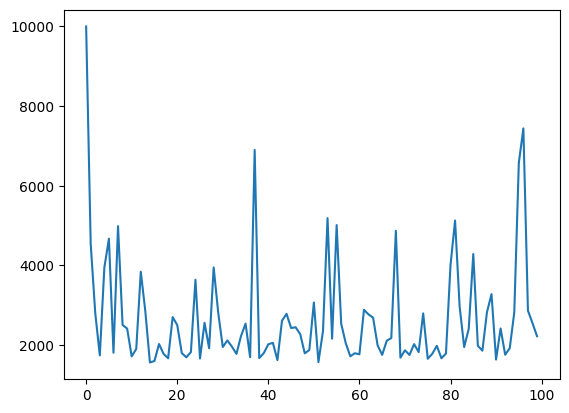

In [ ]:
plt.plot(losses)

In [ ]:
def plot_hyperplane(w1, w2, b):
    plt.figure(figsize=(12, 12))
    x1 = np.linspace(-2, 4, 10)
    x2 = -(w1 * x1 + b)/w2
    xp = -(w1 * x1 + b + 1)/w2
    xn = -(w1 * x1 + b - 1)/w2

    plt.plot(x1, x2, label="WX+B=0")
    plt.plot(x1, xp, label="WX+B=1")
    plt.plot(x1, xn, label="WX+B=-1")
    plt.legend()

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

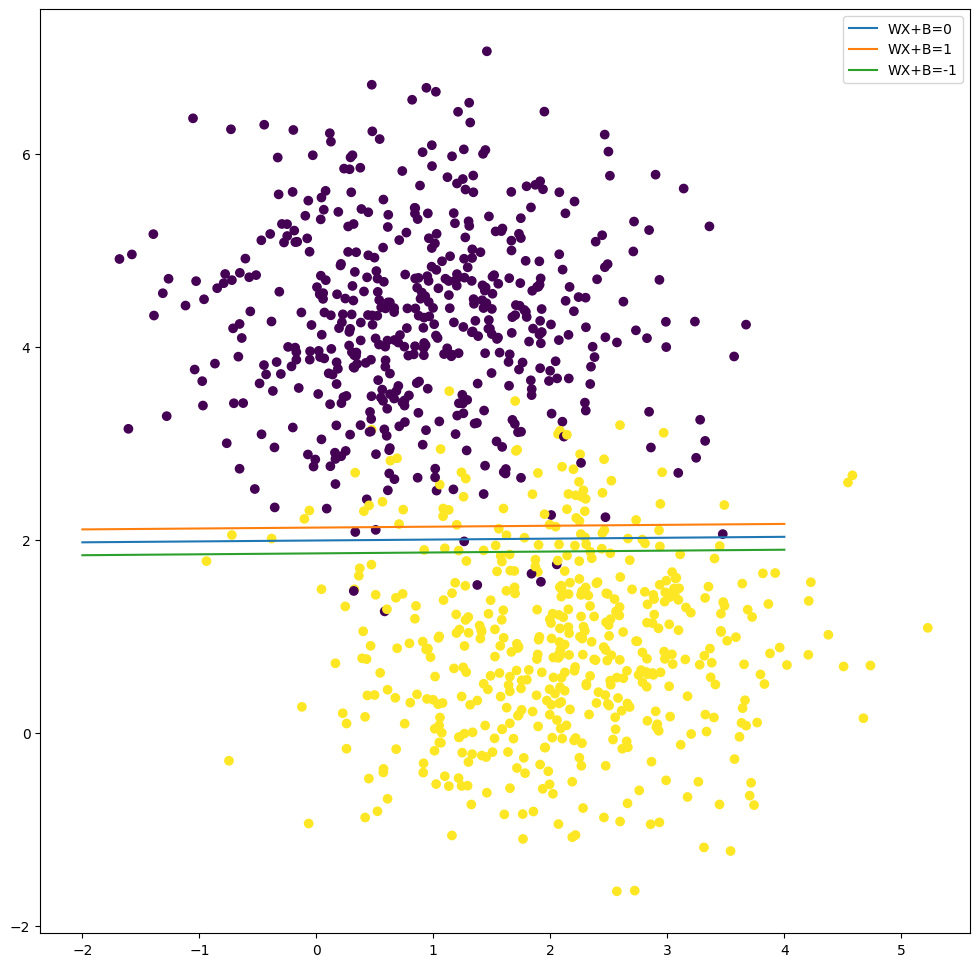

In [ ]:
plot_hyperplane(W[0,0], W[0, 1], b)